<a href="https://colab.research.google.com/github/Haditamaaa/Convolutional-Neural-Network-Beras/blob/main/CNN4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Collection Data***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ***Preprocessing Dataset***

### *Hidden Files*




In [ ]:
input_path = "/content/drive/MyDrive/ASKRIPSI/BERASCNN"
output_path = "/content/drive/MyDrive/ASKRIPSI/BERASCNNJADI"

In [ ]:
import os
import cv2

for subfolder in os.listdir(input_path):
  input_subfolder_path = os.path.join(input_path, subfolder)
  output_subfolder_path = os.path.join(output_path, subfolder)

  os.makedirs(output_subfolder_path, exist_ok=True)

  for filename in os.listdir(input_subfolder_path):
     input_image_path = os.path.join(input_subfolder_path, filename)
     output_image_path = os.path.join(output_subfolder_path, filename)

     img = cv2.imread(input_image_path)

     gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

     _, threshold_img = cv2.threshold(gray_img, 0 , 255,
                                  cv2.THRESH_BINARY +
                                  cv2.THRESH_OTSU)

     cv2.imwrite(output_image_path, threshold_img)

In [ ]:
import shutil
from PIL import Image

def augment_dataset(input_path3, output_path3, degrees=45, times=10):
    os.makedirs(output_path3, exist_ok=True)

    # Iterate over the subfolders in the dataset directory
    for subfolder_name in os.listdir(input_path3):
        subfolder_path = os.path.join(input_path3, subfolder_name)
        if not os.path.isdir(subfolder_path):
            continue  # Skip non-directory files

        output_subfolder_path = os.path.join(output_path3, subfolder_name)
        os.makedirs(output_subfolder_path, exist_ok=True)

        # Iterate over the images in the subfolder
        for filename in os.listdir(subfolder_path):
            img_path = os.path.join(subfolder_path, filename)
            img = Image.open(img_path)

            # Apply rotation augmentation
            for i in range(times):
                # Rotate the image
                rotated_img = img.rotate(degrees * (i + 1))

                # Save the augmented image
                output_filename = f"augmented_{degrees * (i + 1)}_{filename}"
                output_path = os.path.join(output_subfolder_path, output_filename)
                rotated_img.save(output_path)


In [ ]:
input_path3 = '/content/drive/MyDrive/ASKRIPSI/BERASCNNJADI'
output_path3 = '/content/drive/MyDrive/ASKRIPSI/BERASCNNSIP'
degrees = 45
times = 10

augment_dataset(input_path3, output_path3, degrees, times)

## ***Import Library***

In [ ]:
import numpy as np
import os, random, shutil
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.image as img
import random

## ***Source Image***

In [ ]:
label = ["IR42", "IR64", "PandanWangi", "PeraPadang", "Rojolele"]
root_path = "/content/drive/MyDrive/ASKRIPSI"
source_path = "/content/drive/MyDrive/ASKRIPSI/BAUGM"

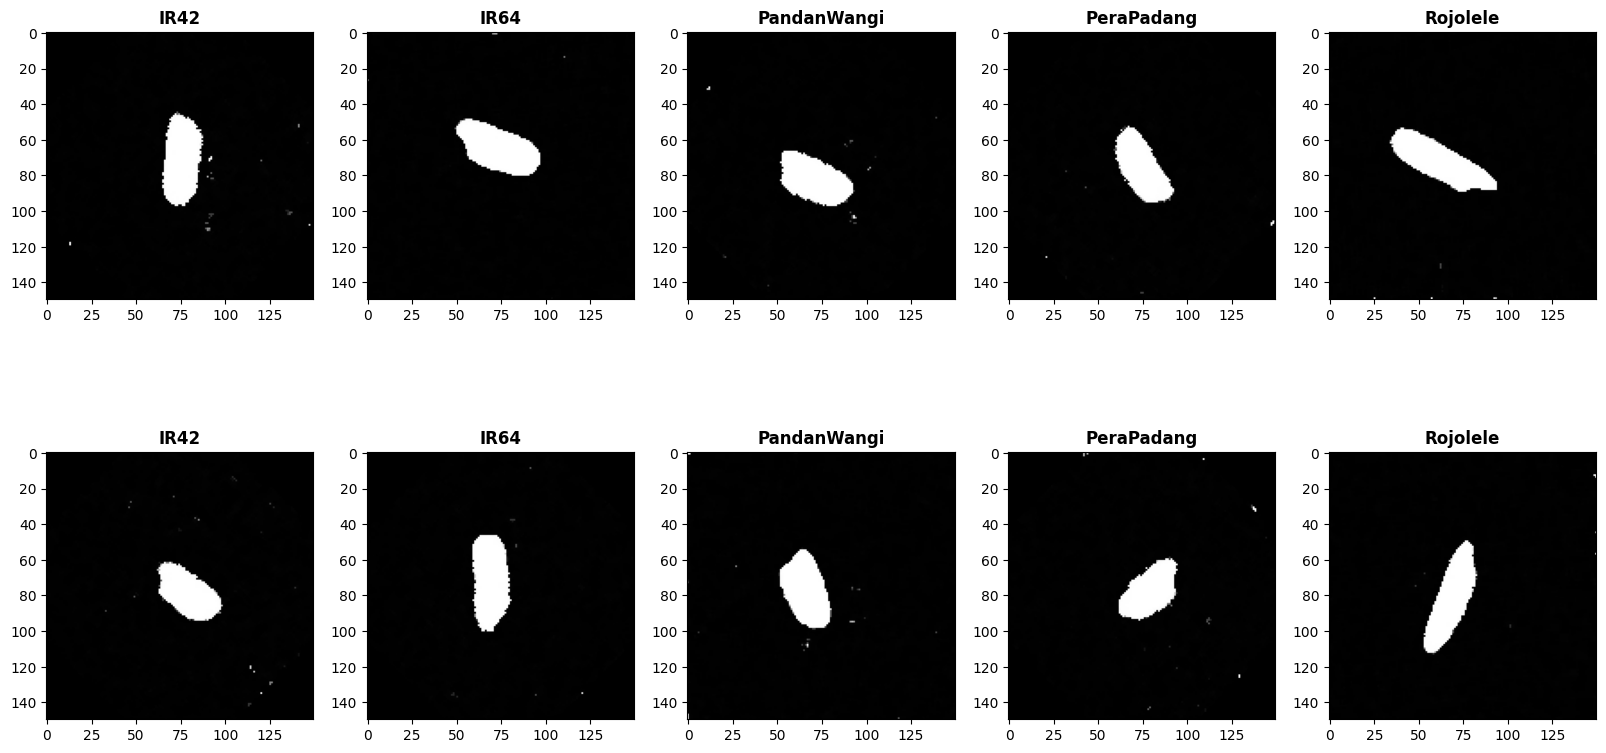

In [ ]:
fig = plt.figure(figsize = (20, 10))
image_position = 0

for j in range(2):
    for index, folder in enumerate(label):
        image_position += 1
        folder_path = os.path.join(source_path, folder)

        fig.add_subplot(2, 5, image_position)
        plt.title(folder, fontweight='bold')
        plt.imshow(img.imread(os.path.join(folder_path, random.choice(os.listdir(folder_path)))))

# ***Preparation Convolutional Neural Network (CNN) Classification***

## ***Splitted Dataset***

In [ ]:
target_path = 'Splitted'

os.makedirs(os.path.join(target_path, 'train'))
os.makedirs(os.path.join(target_path, 'test'))

for l in label:
    os.makedirs(os.path.join(target_path, f'train/{l}'))
    os.makedirs(os.path.join(target_path, f'test/{l}'))

In [ ]:
from collections import Counter

for l in label:
    full_dataset_from_this_class = os.listdir(os.path.join(source_path, l))
    to_be_train_set = random.sample(full_dataset_from_this_class, 400)
    to_be_test_set = list((Counter(full_dataset_from_this_class) - Counter(to_be_train_set)).elements())

    # Copy ke folder sebelah
    for file_name in to_be_train_set:
        shutil.copyfile(
            os.path.join(source_path, l, file_name),
            os.path.join(target_path, f'train/{l}', file_name)
        )

    for file_name in to_be_test_set:
        shutil.copyfile(
            os.path.join(source_path, l, file_name),
            os.path.join(target_path, f'test/{l}', file_name)
        )

In [ ]:
train_path = os.path.join(target_path, 'train')
test_path = os.path.join(target_path, 'test')

In [ ]:
train_dir = "/content/Splitted/train"
eval_dir = "/content/Splitted/test"

In [ ]:
#Helper function to load images from given directories
def load_images(directory):
    images = []
    labels = []
    for idx, label in enumerate(uniq_labels):
        for file in os.listdir(directory + "/" + label):
            filepath = directory + "/" + label + "/" + file
            image = cv2.resize(cv2.imread(filepath), (64, 64))
            images.append(image)
            labels.append(idx)
    images = np.array(images)
    labels = np.array(labels)
    return(images, labels)

In [ ]:
import keras
import cv2

uniq_labels = sorted(os.listdir(train_dir))
images, labels = load_images(directory = train_dir)

if uniq_labels == sorted(os.listdir(eval_dir)):
    X_eval, y_eval = load_images(directory = eval_dir)

In [ ]:
from sklearn.model_selection import train_test_split
import time

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, stratify = labels)

n = len(uniq_labels)
train_n = len(X_train)
test_n = len(X_test)

print("Total number of label: ", n)
print("Number of training images: " , train_n)
print("Number of testing images: ", test_n)

eval_n = len(X_eval)
print("Number of evaluation images: ", eval_n)

Total number of label:  5
Number of training images:  1600
Number of testing images:  400
Number of evaluation images:  500


In [ ]:
uniq_labels

['IR42', 'IR64', 'PandanWangi', 'PeraPadang', 'Rojolele']

In [ ]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
y_eval = keras.utils.to_categorical(y_eval)

In [ ]:
print(y_train[0])
print(len(y_train[0]))

[1. 0. 0. 0. 0.]
5


In [ ]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0
X_eval = X_eval.astype('float32')/255.0

## ***Import Library***

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
import keras

## ***Modelling Convolutional Neural Network (CNN) Classification***

In [ ]:
# Load pre-trained model
base_model = ResNet50(
    weights="imagenet",
    input_shape=(64, 64, 3),
    include_top=False,
)

# Freeze the base_model
base_model.trainable = False

94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
inputs = keras.Input(shape=(64, 64, 3))
x = base_model(inputs, training=False)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(32, activation='relu')(x)
outputs = keras.layers.Dense(5, activation='softmax')(x)

model = keras.Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 32)                262176    
                                                                 
 dense_1 (Dense)             (None, 5)                 165       
                                                                 
Total params: 23,850,053
Trainable params: 262,341
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

In [ ]:
#fit the model
#it will take some time to train
start_time = time.time()
history = model.fit(X_train, y_train, epochs =10, batch_size = 64,validation_data=(X_test,y_test))
training_time = time.time() - start_time

Epoch 1/10
25/25 [==============================] - 36s 1s/step - loss: 1.6279 - accuracy: 0.2225 - val_loss: 1.6029 - val_accuracy: 0.2500
Epoch 2/10
25/25 [==============================] - 35s 1s/step - loss: 1.5546 - accuracy: 0.3013 - val_loss: 1.5651 - val_accuracy: 0.3200
Epoch 3/10
25/25 [==============================] - 33s 1s/step - loss: 1.5360 - accuracy: 0.2906 - val_loss: 1.5244 - val_accuracy: 0.2975
Epoch 4/10
25/25 [==============================] - 34s 1s/step - loss: 1.4797 - accuracy: 0.3431 - val_loss: 1.5256 - val_accuracy: 0.3200
Epoch 5/10
25/25 [==============================] - 35s 1s/step - loss: 1.4685 - accuracy: 0.3681 - val_loss: 1.4765 - val_accuracy: 0.3425
Epoch 6/10
25/25 [==============================] - 30s 1s/step - loss: 1.4511 - accuracy: 0.3569 - val_loss: 1.4773 - val_accuracy: 0.3300
Epoch 7/10
25/25 [==============================] - 33s 1s/step - loss: 1.4279 - accuracy: 0.3713 - val_loss: 1.4810 - val_accuracy: 0.3400
Epoch 8/10
25/25 [==

In [ ]:
start_time = time.time()  # Get start time
predictions = model.predict(X_test)  # Make predictions
inference_time = time.time() - start_time  # Calculate inference time

13/13 [==============================] - 6s 449ms/step


## ***Evaluation Convolutional Neural Network (CNN) Classificaation***

In [ ]:
score = model.evaluate(x = X_test, y = y_test, verbose = 0)
print('Accuracy for test images:', round(score[1]*100, 3), '%')
score = model.evaluate(x = X_eval, y = y_eval, verbose = 0)
print('Accuracy for evaluation images:', round(score[1]*100, 3), '%')
print(f"Training Time: {training_time:.4f} seconds")
print(f"Inference Time: {inference_time:.4f} seconds")

Accuracy for test images: 40.75 %
Accuracy for evaluation images: 37.4 %
Training Time: 342.6866 seconds
Inference Time: 10.3423 seconds


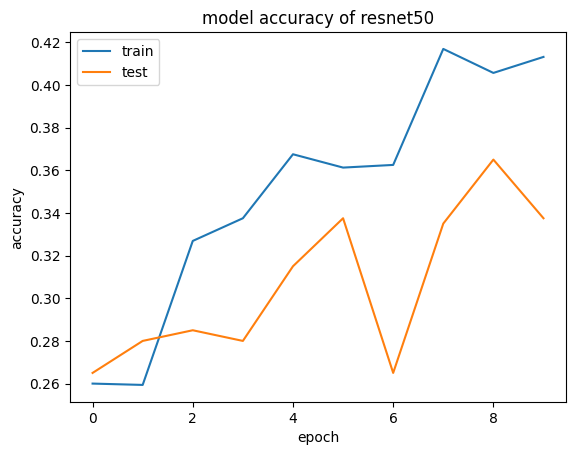

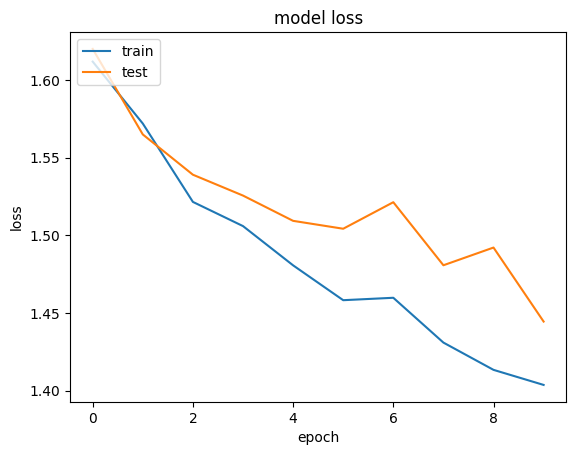

In [ ]:
#resnet50
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy of resnet50')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


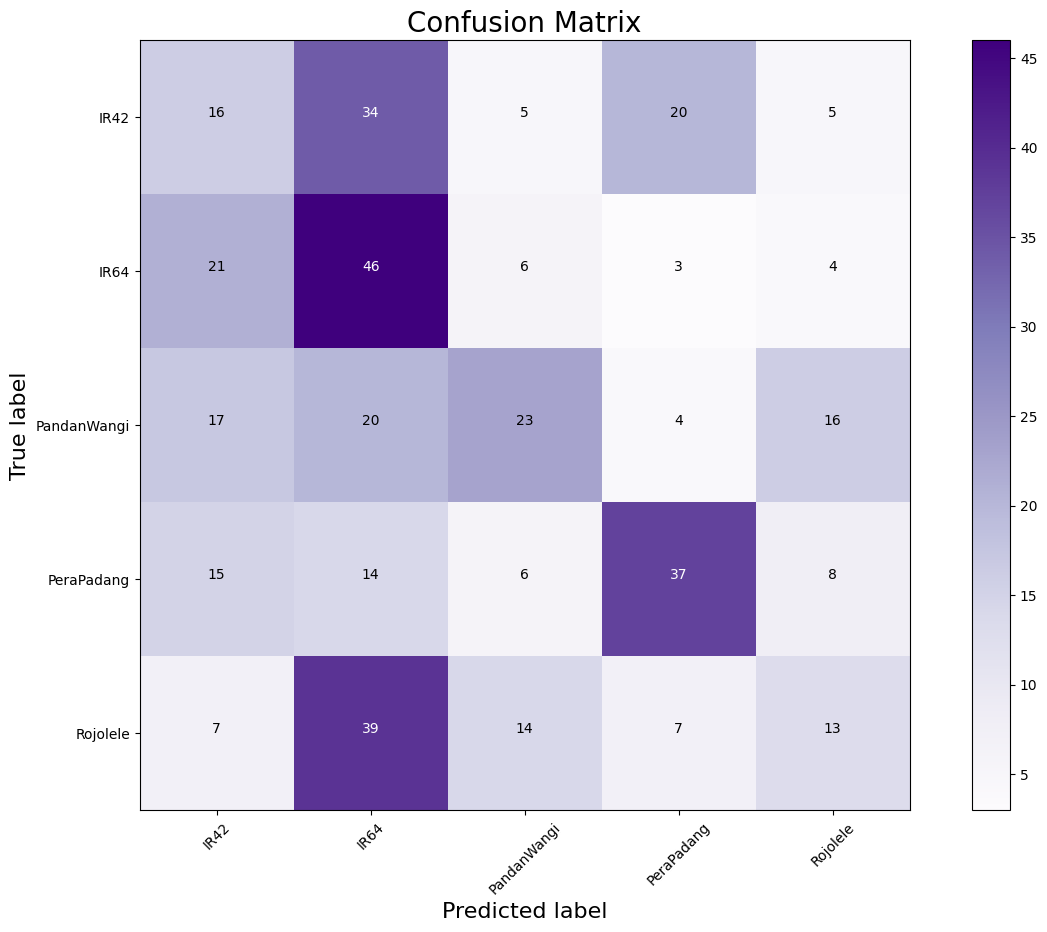

In [ ]:
def plot_confusion_matrix(y, y_pred):
    y = np.argmax(y, axis = 1)
    y_pred = np.argmax(y_pred, axis = 1)
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize = (16, 10))
    ax = plt.subplot()
    plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
    plt.colorbar()
    plt.title("Confusion Matrix")
    tick_marks = np.arange(len(uniq_labels))
    plt.xticks(tick_marks, uniq_labels, rotation=45)
    plt.yticks(tick_marks, uniq_labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    ax.title.set_fontsize(20)
    ax.xaxis.label.set_fontsize(16)
    ax.yaxis.label.set_fontsize(16)
    limit = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
    plt.show()
from sklearn.metrics import confusion_matrix
import itertools

y_test_pred = model.predict(X_test, batch_size = 64, verbose = 0)
plot_confusion_matrix(y_test, y_test_pred)

1/1 [==============================] - 0s 86ms/step
[[8.0822028e-06 1.9906571e-03 8.3151239e-01 1.2621170e-07 1.6648877e-01]]
Rojolele


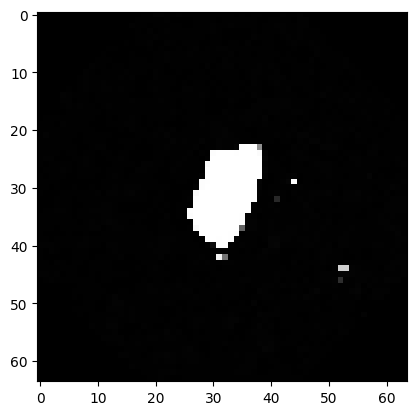

In [ ]:
# for only one prediction
import numpy as np
import keras.utils as image
test_image = image.load_img('/content/Splitted/test/IR42/augmented_135_IMG20230720002944.jpg_denoised.png',target_size=(64,64))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)

print(result)
IR42, IR64, PandanWangi, PeraPadang, Rojolele = result[0]

if IR42==1.:
    print('IR42')
elif IR64==1.:
    print('IR64')
elif PandanWangi==1.:
    print('PandanWangi')
elif PeraPadang==1.:
    print('PeraPadang')
else:
    print('Rojolele')
